In [3]:
from option import args
import torch
import utility
import data
import utils
import model
import loss
from trainer import Trainer
import os
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(args.seed)
ids = utils.get_ids()
# ids.sort()
total_vols = args.no_vols+args.test_vols
ids.sort()
ids = ids[:total_vols]
ids = np.random.choice(ids,total_vols,replace = False)
print(ids)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


number of common Subjects  171
['104416' '128935' '109123' '115017' '102816' '125525' '105923' '130114'
 '111312' '102311' '118225' '100610' '131722' '130518' '114823' '126426'
 '111514' '116726' '115825' '108323']


In [4]:

args.run_name = "jupyter"
if(args.model_type == '2d'):
    args.block_size = (32,32,1)

if (args.run_name == '..'):
    args.run_name = f"{args.model},attn_{args.attention},{args.model_type},{args.encoder},{args.no_vols}_train,{args.test_vols}_test,growth{args.growth},loss_{args.loss},start_var_{args.start_var},batch_size{args.batch_size}"
else:
    args.run_name = f"{args.model},attn_{args.attention},{args.model_type},{args.encoder},{args.no_vols}_train,{args.test_vols}_test,growth{args.growth},loss_{args.loss},start_var_{args.start_var},batch_size{args.batch_size},{args.run_name}"
print(args.run_name)




dmri_rdn,attn_False,3d,rdb,10_train,10_test,growth32,loss_1*MSE,start_var_True,batch_size8,jupyter


In [5]:
checkpoint = utility.checkpoint(args)       ## setting the log and the train information
if checkpoint.ok:
    loader = data.Data(args,ids= ids)

Loading Done


In [6]:
t  = next(iter(loader.training_data))

In [7]:
t[0].shape,t[1].shape,t[2]

(torch.Size([1, 8, 8, 32, 32, 7]),
 torch.Size([1, 8, 8, 32, 32, 5]),
 tensor([[1., 1., 1.]], dtype=torch.float64))

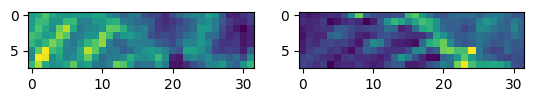

In [8]:
%matplotlib inline
fig,ax = plt.subplots(1,2)
i=6
lr = t[0][0,i,:,:,0,0].numpy().squeeze()
hr = t[1][0,i,:,:,0,0].numpy().squeeze()
ax[0].imshow(lr)
ax[1].imshow(hr)
# plt.show()

In [9]:
model = model.Model(args)

Making model... here


In [10]:
t[0].squeeze().shape

torch.Size([8, 8, 32, 32, 7])

In [11]:
lr = torch.permute(t[0].squeeze(), (0,4,1,2,3)).to('cuda')

In [12]:
lat_fea = model.model.encoder(lr)

In [13]:
lat_fea.shape

torch.Size([8, 32, 8, 32, 32])

In [14]:
B, C, H, W,D = lat_fea.shape

In [15]:
t[2]

tensor([[1., 1., 1.]], dtype=torch.float64)

In [16]:
B,C,H,W,D

(8, 32, 8, 32, 32)

In [17]:
import math

[71.91465199607916]

In [22]:
lat_fea.shape

torch.Size([8, 32, 8, 32, 32])

In [34]:
size = [35,35,7]

In [7]:
t  = next(iter(loader.testing_data))

In [8]:
t[0].shape,t[1].shape,t[3].shape

(torch.Size([1, 16, 32, 32, 4, 7]),
 torch.Size([1, 16, 32, 32, 4, 5]),
 torch.Size([1, 16, 32, 32, 4, 5]))

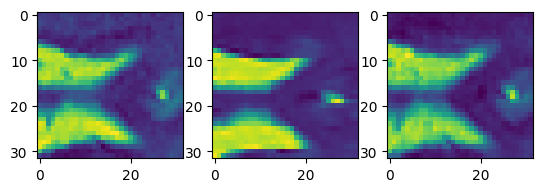

In [9]:
i=6
fig,ax = plt.subplots(1,3)

lr = t[0][0,i,:,:,2,0].numpy().squeeze()
hr = t[1][0,i,:,:,2,0].numpy().squeeze()
out = t[3][0,i,:,:,2,0].numpy().squeeze()
ax[0].imshow(lr)
ax[1].imshow(hr)
ax[2].imshow(out)
plt.show()

In [10]:
logger = SummaryWriter('runs/'+ args.run_name)
model = model.Model(args)
loss = loss.Loss(args, checkpoint)

Making model... here
Preparing loss function:
1.000 * MSE


In [15]:
model

Model(
  (model): DMRI_RDN_3d(
    (encoder): RDN(
      (SFENet1): Conv3d(7, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (SFENet2): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (RDBs): ModuleList(
        (0-4): 5 x RDB(
          (convs): Sequential(
            (0): RDB_Conv(
              (conv): Sequential(
                (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
                (1): ReLU()
              )
            )
            (1): RDB_Conv(
              (conv): Sequential(
                (0): Conv3d(64, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
                (1): ReLU()
              )
            )
            (2): RDB_Conv(
              (conv): Sequential(
                (0): Conv3d(96, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
                (1): ReLU()
              )
            )
            (3): RDB_Conv(
             


nan:   5%|█                  | 25/471 [00:22<00:48,  9.19it/s, scale=[1. 1. 1.], blk_size=[8, 32, 4, 32, 7], non_zero=0]

In [12]:
t = Trainer(args, loader, model, loss, checkpoint,logger)

In [14]:
t.train()

[Epoch 0]	Learning rate: 5.00e-3



nan:   5%|█                  | 25/471 [00:03<00:48,  9.19it/s, scale=[1. 1. 1.], blk_size=[8, 32, 4, 32, 7], non_zero=0]

KeyboardInterrupt: 

In [ ]:
q = Trainer(args, loader, model, loss, checkpoint,logger)

In [ ]:
q.test()

In [36]:
t.test()

100%|███| 240/240 [00:56<00:00,  4.90it/s, scale=[1. 1. 1.], blk_size=[8, 4, 32, 32, 7], hfen=nan, psnr=nan, non_zero=0]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_17298/2615950094.py", line 1, in <module>
    t.test()
  File "/workspace/Code/HCP_SR/trainer.py", line 190, in test
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/writer.py", line 517, in add_histogram
    histogram(tag, values, bins, max_bins=max_bins), global_step, walltime
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/summary.py", line 459, in histogram
    hist = make_histogram(values.astype(float), bins, max_bins)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/summary.py", line 504, in make_histogram
    raise ValueError("The histogram is empty, please file a bug report.")
ValueError: The histogram is empty, please file a bug report.

During handling of the above exception, another exception

In [58]:

while not t.terminate():
    t.train()
    t.test()
    # break

# checkpoint.done()

[Epoch 0]	Learning rate: 5.00e-3


  0%|                                                                                           | 0/214 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3516.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
 15%|██▎            | 17/110 [00:06<00:37,  2.50it/s, scale=[1. 1. 1.], blk_size=[16, 4, 32, 32, 7], hfen=nan, psnr=nan]

KeyboardInterrupt: 